# League of Legends (LOL) - 15분 항복을 할까 말까?

League of Legends는 5명씩 한 팀을 이뤄 2팀(블루, 레드)이 게임을 하고 상대방의 넥서스를 부수면 승리하는 게임입니다. 승부는 보통 25 ~ 30분 사이에 납니다. 하지만 팀원들과의 동의하에 항복해서 게임을 더 일찍 끝낼 수 있습니다. 처음 15분은 항복을 할 수 없으며 15 ~ 20분 사이에 항복하기 위해서는 팀원 전부 5명의 동의가 필요하고 20분 이후부터는 4명의 동의가 필요합니다. 게임 초반 상황이 불리해져 15분 항복을 하려 할 때 꼭 한 명이 반대해 승산 없는 게임을 하게 됩니다. 이때 우리가 게임의 유불리를 수치상으로 제시 할 수 있다면 팀원들을 설득하기 수월할 것입니다.


본 분석은 처음 10분 게임 데이터를 통해 승률을 제시하여 승산 없는 게임에 시간과 노력을 투자하는 것을 막는 데에 목적이 있습니다.

데이터 세트는 kaggle에서 가져온 'League of Legends Diamond Ranked Games (10 min)' 입니다. 총 9,879개의 DIAMOND 1 to MASTER 랭크(상위 0.4% 이내)의 처음 10분 게임 데이터며 총 40개의 칼럼으로 구성되어 있습니다.

데이터를 살펴보도록 하겠습니다.

In [125]:
import pandas as pd
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


레드팀, 블루팀 각각 19개의 칼럼을 가지고 있습니다. 이때 중복되는 칼럼들이 있습니다. 예를 들어, blueKills 5이면 필연적으로 redDeaths 5입니다. 마찬가지로 blueDeaths 5이면 필연적으로 redKills 5입니다. 이와 같아 중복되는 칼럼들과 승패 예측에 필요 없는 칼럼 gameId를 삭제하겠습니다.

In [126]:
df = df.drop(['gameId','redFirstBlood','redKills','redDeaths','redEliteMonsters','blueEliteMonsters'], axis = 1 )

In [127]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,0,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


또한 플레이 중인 상황에서 파악할 수 없는 정보들이 있습니다. 예를 들면 상대방이 가지고 있는 골드의 양과 상대방이 설치한 와드(시야 확보를 위한 물건)의 개수 등입니다. 본 분석의 목적이 플레이어가 파악 가능한 정보를 가지고 항복을 할지 게임을 계속할지 판단하는 데 도움을 주는 데 있으므로 위와 같은 정보를 가진 칼럼들은 삭제하도록 하겠습니다.

In [128]:
df = df.drop(['blueWardsPlaced','blueWardsDestroyed','blueTotalGold','blueTotalExperience','blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff','blueCSPerMin','blueGoldPerMin'],axis=1)
df = df.drop(['redWardsPlaced','redWardsDestroyed','redTotalGold','redTotalExperience','redTotalJungleMinionsKilled','redGoldDiff','redExperienceDiff','redCSPerMin','redGoldPerMin'],axis=1)

In [129]:
df.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,redAssists,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled
0,0,1,9,6,11,0,0,0,6.6,195,8,0,0,0,6.8,197
1,0,0,5,5,5,0,0,0,6.6,174,2,1,1,1,6.8,240
2,0,0,7,11,4,1,0,0,6.4,186,14,0,0,0,6.8,203
3,0,0,4,5,5,0,1,0,7.0,201,10,0,0,0,7.0,235
4,0,0,6,6,6,0,0,0,7.0,210,7,1,0,0,7.0,225


편의상 블루팀을 우리 팀 레드팀을 적팀으로 부르기로 합시다.
Kill 수가 게임 승패에 영향을 미친다고 가정할 때 우리는 절대적인 Kill 수가 아니라 상대편의 Kill 수와 비교했을 때 얼마만큼의 차이가 나는 지를 고려해야 합니다. 우리 팀의 Kill 수가 많으면 우리 팀이 유리할 것이고 적다면 적팀이 유리할 것입니다.
새로운 칼럼 Kills_dif = blueKills - blueDeaths(=redKills)를 통해
우리 팀과 적팀의 킬 수의 차이를 나타내겠습니다. 우리 팀이 파괴한 타워 수, 평균 레벨 등 도 적팀과 얼마나 차이 나는지 새로운 칼럼을 통해 나타내도록 하겠습니다.

In [130]:
df_ = df.copy()

In [131]:
df_['Kills_dif'] = df_['blueKills'] - df_['blueDeaths']
df_['Assists_dif'] = df_['blueAssists'] - df_['redAssists']
df_['Dragons_dif'] = df_['blueDragons'] - df_['redDragons']
df_['Heralds_dif'] = df_['blueHeralds'] - df_['redHeralds']
df_['TowersDestroyed_dif'] = df_['blueTowersDestroyed'] - df_['redTowersDestroyed']
df_['AvgLevel_dif'] = df_['blueAvgLevel'] - df_['redAvgLevel']
df_['TotalMinionsKilled_dif'] = df_['blueTotalMinionsKilled'] - df_['redTotalMinionsKilled']

In [132]:
df_ = df_.drop(['blueKills','blueDeaths','blueAssists','redAssists','blueDragons','redDragons','blueHeralds','redHeralds','blueTowersDestroyed','redTowersDestroyed','blueAvgLevel','redAvgLevel','blueTotalMinionsKilled','redTotalMinionsKilled'],axis=1)

In [133]:
df_.head()

,blueWins,blueFirstBlood,Kills_dif,Assists_dif,Dragons_dif,Heralds_dif,TowersDestroyed_dif,AvgLevel_dif,TotalMinionsKilled_dif
0,0,1,3,3,0,0,0,-0.2,-2
1,0,0,0,3,-1,-1,-1,-0.2,-66
2,0,0,-4,-10,1,0,0,-0.4,-17
3,0,0,-1,-5,0,1,0,0.0,-34
4,0,0,0,-1,-1,0,0,0.0,-15


이제 데이터 세트를 통해 logistic regression 모델을 만들고 이를 통해 각 게임의 승률을 구해보도록 하겠습니다. 후에 모델의 성능을 테스트 하기 위해 데이터의 70%로만 모델을 만들고 나머지 30%로는 테스트를 하겠습니다.

In [134]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_, test_size=0.3, random_state=1)

In [135]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = 'blueWins ~ blueFirstBlood + Kills_dif + Assists_dif + Dragons_dif + Heralds_dif + TowersDestroyed_dif + AvgLevel_dif + TotalMinionsKilled_dif'

logreg = smf.glm(formula = formula, data = df_, family=sm.families.Binomial()).fit()

In [148]:
print('                         parameters')
print('')
print(logreg.params)

                         parameters

Intercept                -0.053452
blueFirstBlood            0.129598
Kills_dif                 0.175932
Assists_dif               0.003095
Dragons_dif               0.304838
Heralds_dif               0.130254
TowersDestroyed_dif       0.233772
AvgLevel_dif              0.977586
TotalMinionsKilled_dif    0.006727
dtype: float64


In [137]:
prob_test = logreg.predict(df_test[[ 'blueFirstBlood', 'Kills_dif', 'Assists_dif'
       , 'Dragons_dif', 'Heralds_dif',
       'TowersDestroyed_dif', 'AvgLevel_dif', 'TotalMinionsKilled_dif']])

In [14]:
from sklearn.metrics import roc_auc_score

In [18]:
roc_auc = roc_auc_score(y_true=df_test['blueWins'], y_score=prob_test)
print('roc_auc : ',roc_auc)

roc_auc :  0.8148122514121272


roc_auc가 0.8 이상으로 꽤 훌륭한 모델임을 알 수 있습니다.

이제 Wald test를 통해 각각의 예측 변수가 유의미 한지 살펴보겠습니다.

In [19]:
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               blueWins   No. Observations:                 9879
Model:                            GLM   Df Residuals:                     9870
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5322.5
Date:                Mon, 04 Oct 2021   Deviance:                       10645.
Time:                        21:11:18   Pearson chi2:                 9.84e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

Assists_dif는 p 값이 0.688로 승부 예측에 무의미한 변수임을 알 수 있습니다. TowerDestroyed_dif는 95%, 나머지 모든 예측 변수는 99% 유의수준 하에서 승부 예측에 유의미한 변수임을 알 수 있습니다.

이제 각 독립 변수가 승률에 어떻게 영향을 미치는지 알아보겠습니다.

In [29]:
def Log_odds(bFB,Kd,Ad,Dd,Hd,TDd,ALd,TMKd):

    logit = -0.053452 + 0.129598*bFB+0.175932*Kd+ 0.003095*Ad+ 0.304838*Dd+ 0.130254*Hd+ 0.233772*TDd+0.977586*ALd+0.006727*TMKd
    
    return logit

In [30]:
import math

def sigmoid(Log_odds):
    
    P = (1/(1+math.exp(-Log_odds))) # here we recover P from log-odds
    
    return P

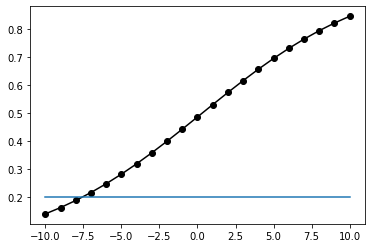

In [166]:
Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,0,0,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.plot(Kd,P,color='black', marker='o',label='normal')
plt.plot(Kd,[0.2 for i in range(len(Kills_dif))])

적팀과 Kill 수의 차이에 따른 승률 그래프입니다(적팀 FirstBlood 기준). 적팀이 1Kill 더 할 때 마다 승률이 4%씩 감소하기 시작하여 Kill 차이가 늘어날수록 승률감소 폭이 줄어듭니다. 7Kill 정도 차이가 나면 승률이 20%가량 되므로 항복하는 게 좋을 듯 합니다.

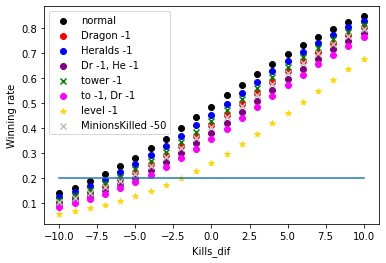

In [201]:
Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,0,0,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='black', marker='o',label='normal')


Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,-1,0,0,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='red', marker='o',label='Dragon -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,-1,0,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='blue', marker='o',label='Heralds -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,-1,-1,0,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='purple', marker='o',label='Dr -1, He -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,0,-1,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='green', marker='x',label='tower -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,-1,0,-1,0,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='magenta', marker='o',label='to -1, Dr -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,0,0,-1,0)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='gold', marker='*',label='level -1')

Kd = []
P =[]
for i in Kills_dif:
    logit = Log_odds(0,i,0,0,0,0,0,-50)
    p = sigmoid(logit)
    Kd.append(i)
    P.append(p)
plt.scatter(Kd,P,color='silver', marker='x',label='MinionsKilled -50')


plt.legend()
plt.xlabel('Kills_dif')
plt.ylabel('Winning rate')

plt.plot(Kd,[0.2 for i in range(len(Kills_dif))])

승률이 적팀이 dragon을 처치하면 7%, Herald를 처치하면 3%, 적팀보다 파괴한 타워의 수가 1 적으면 6%, 평균 level이 1 낮으면 22%, MinionKilled가 50 적으면 8% 감소합니다. 다른 변수와 동시에 고려될 때 그 감소 폭이 줄어듭니다.

각 변수가 승률에 미치는 영향을 살펴보았습니다. 위 그래프에 담지 못할 만큼 변수들의 다양한 조합에 따른 상황들이 존재할 수 있으며 우리가 구한 logistic regression 모델로 주어진 상황에 대한 승률을 구할 수 있습니다.

예를 들어
처음 10분간 우리 팀이 Firstblood를 당하고, 적팀에 비해 3킬, 파괴한 타워 수가 1개 적으며 적팀이 Dragon까지 처치하고 평균 Level 차이가 0.6인 상황이라고 합시다.

In [203]:
logit = Log_odds(0,-3,0,-1,0,-1,-0.6,0)
p = sigmoid(logit)
p

0.15362998727013352

이때 승률은 15.3%가량 됩니다. 팀원들을 설득해 15분이 되면 항복 하는 게 좋을 듯 합니다.